# IYKRA's Basic Data Analysis Practice Case

On this week's basic data analysis module, we are required to solve some basic data analysis cases about hotels' bookings and demands. You can find the dataset here:

https://www.kaggle.com/jessemostipak/hotel-booking-demand

Here are the problems that need to be solved:
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations? 

In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Ritz_Jager_Data.csv').drop_duplicates()
pd.set_option('display.max_columns', None)

In [2]:
data.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
#Quick look at the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel_type                      87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal_type                      

# Question #1

In [4]:
#Listing each guest's origin country

data['country_origin'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [5]:
#Sorting the top 5 origin countries

top_country = data[data['is_canceled'] == 0].groupby('country_origin', as_index = False).agg(frequency = ('country_origin', 'count'))
top_country = top_country.sort_values('frequency', ascending = False)[:5].reset_index(drop = True)
top_country

,country_origin,frequency
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334


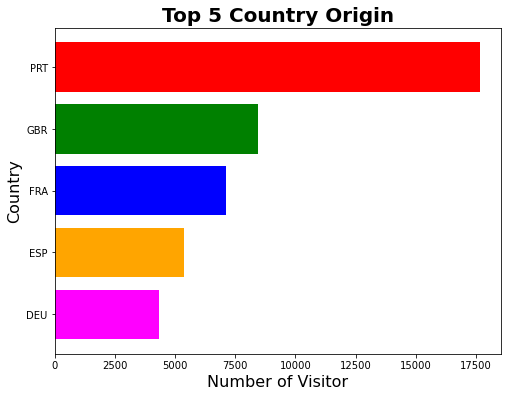

In [6]:
#Plotting

fig, ax = plt.subplots(figsize = [8, 6])

ax.barh(top_country['country_origin'], top_country['frequency'], color = ['red', 'green', 'blue', 'orange', 'magenta'])
ax.set_xlabel('Number of Visitor', fontsize = 16)
ax.set_ylabel('Country', fontsize = 16)
ax.set_title('Top 5 Country Origin', fontsize = 20, fontweight = 'bold')
ax.invert_yaxis()
plt.show()

From the chart above, we could see that **most visitors come from Portugal (PRT)**, followed by United Kingdom (GBR), France (FRA), Spain (ESP), and Germany (DEU).

# Question #2

In [7]:
#Calculating the average of 'adr' column

avg_adr = data['adr'].mean().round(2)

print('On average, each guest paid', avg_adr, 'dollars per night')

On average, each guest paid 106.34 dollars per night


# Question #3

In [8]:
#Formatting 'reservation_status_date' column to a datetime format

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%d/%m/%Y')
data['reservation_status_year_month'] = data['reservation_status_date'].dt.to_period('M')

In [9]:
#Selecting and aggregating required columns

avg_price = data[data['is_canceled'] == 0].groupby('reservation_status_year_month')
avg_price = avg_price.agg(avg_price_per_night = ('adr', 'mean'))
avg_price.head(10)

,avg_price_per_night
reservation_status_year_month,
2015-07,113.054330
2015-08,123.660886
2015-09,103.771154
2015-10,79.819849
2015-11,59.314475
2015-12,60.266065
2016-01,68.994750
2016-02,68.832159
2016-03,73.548916


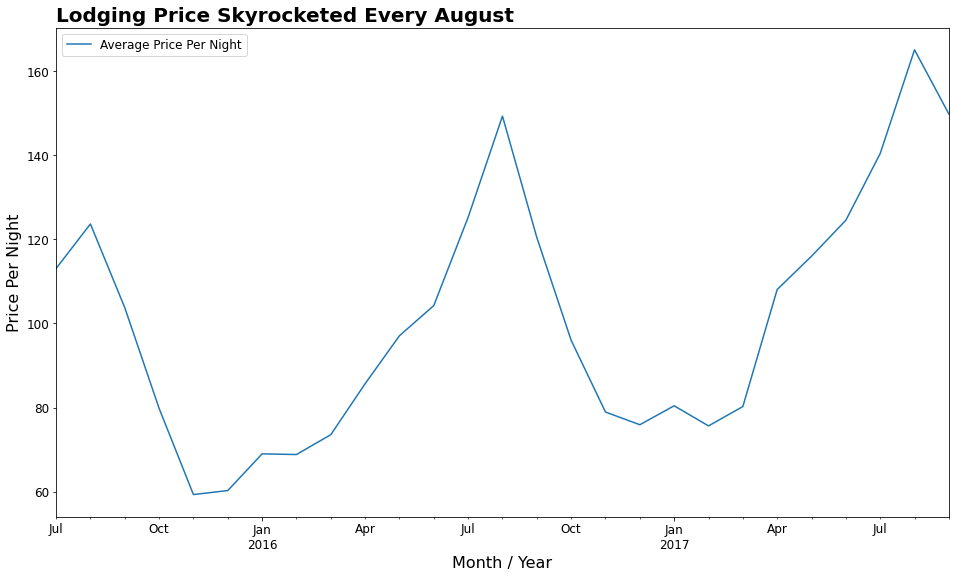

In [10]:
#Plotting

avg_price.plot(figsize = [16, 9], fontsize = 12)
plt.title('Lodging Price Skyrocketed Every August', fontsize = 20, loc = 'left', fontweight = 'bold')
plt.xlabel('Month / Year', fontsize = 16)
plt.ylabel('Price Per Night', fontsize = 16)
plt.legend(['Average Price Per Night'], fontsize = 12)
plt.show()

From the chart above, we could see that lodging price is always **reached its peak on August** every year.

# Question #4

In [11]:
#Selecting required columns

busiest_month = data[data['is_canceled'] == 0]
busiest_month = busiest_month.groupby('reservation_status_year_month').agg(number_of_visitors = ('reservation_status_year_month', 'count'))
busiest_month.head(10)

,number_of_visitors
reservation_status_year_month,
2015-07,977
2015-08,1840
2015-09,2253
2015-10,2316
2015-11,1542
2015-12,1390
2016-01,1743
2016-02,2182
2016-03,2832


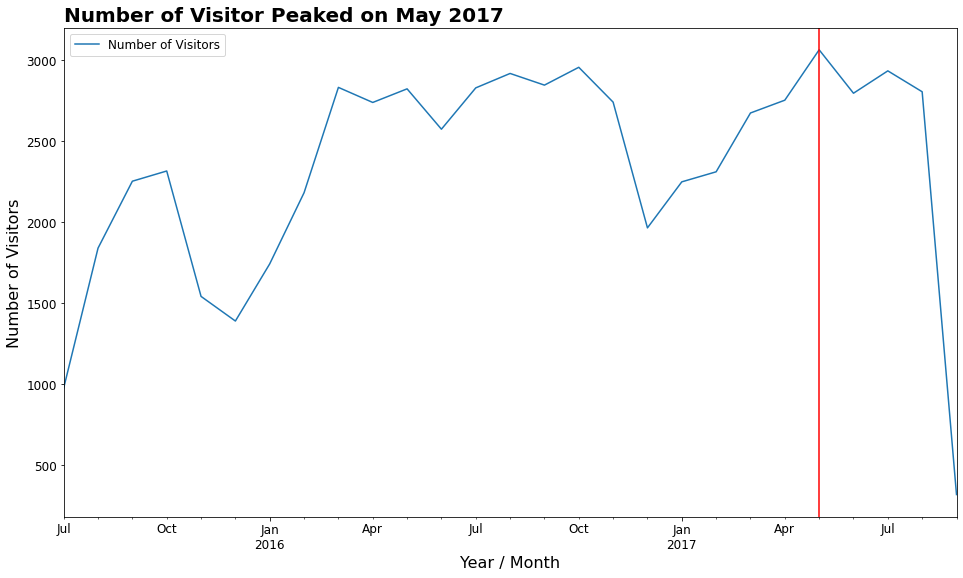

In [12]:
#Plotting

busiest_month.plot(figsize = [16,9], fontsize = 12)
plt.title('Number of Visitor Peaked on May 2017', loc = 'left', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year / Month', fontsize = 16)
plt.ylabel('Number of Visitors', fontsize = 16)
plt.axvline(x = busiest_month.index[busiest_month['number_of_visitors'] == busiest_month['number_of_visitors'].max()], color = 'red')
plt.legend(['Number of Visitors'], fontsize = 12)
plt.show()

From the chart above, we could see that the number of visitors reached its **all time high on May 2016**.

# Question #5

In [13]:
#Selecting required columns

arrival_col = data[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']][data['is_canceled'] == 0]
data['arrival_date'] = arrival_col.apply(lambda x: '-'.join(x.astype('str')), axis = 1)

In [14]:
#Convert it to datetime format

data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [15]:
#Calculate the difference betweeen check-out date and arrival date

data['stay_time'] = data['reservation_status_date'] - data['arrival_date']

#Calculate the mean then print it
avg_stay_time = data['stay_time'].mean()

print('The average stay time is', avg_stay_time)

The average stay time is 3 days 11:38:03.637626043


# Question #6

In [16]:
#Viewing market segment distribution

data['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [17]:
#Dropping the 'Undefined' records

data.drop(data[data['market_segment'] == 'Undefined'].index, inplace = True)

In [18]:
#Preparing the required data to plot

segment_labels = data['market_segment'].value_counts().index.tolist()
segment_values = data['market_segment'].value_counts().tolist()

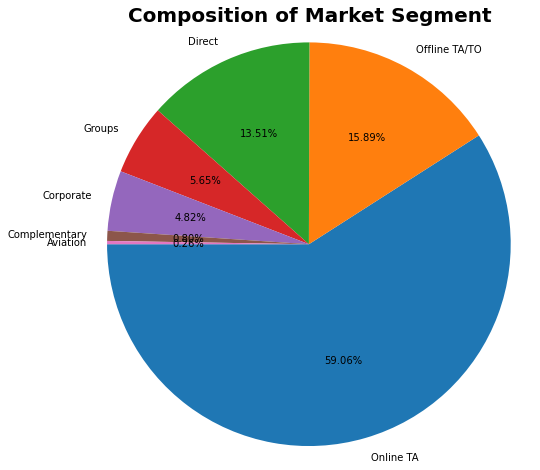

In [19]:
#Plotting

plt.rcParams['figure.figsize'] = 8, 8
plt.pie(segment_values, labels = segment_labels, autopct = '%.2f%%', startangle = 180)
plt.title('Composition of Market Segment', fontsize = 20, fontweight = 'bold')
plt.axis('equal')
plt.show()

The market segment is **dominated by Online TA**, followed by Offline TA/TO and Direct.

# Question #7

In [20]:
#Counting cancelled booking records

num_cancelled_bookings = data['is_canceled'].value_counts()[1]

print('Number of cancelled bookings:', num_cancelled_bookings)

Number of cancelled bookings: 24023


# Question #8

In [21]:
#Selecting and Aggregating required columns

cancelled_bookings = data[data['is_canceled'] == 1]
cancelled_bookings = cancelled_bookings.groupby('reservation_status_year_month').agg(avg_num_cancelled_bookings = ('reservation_status_year_month', 'count'))

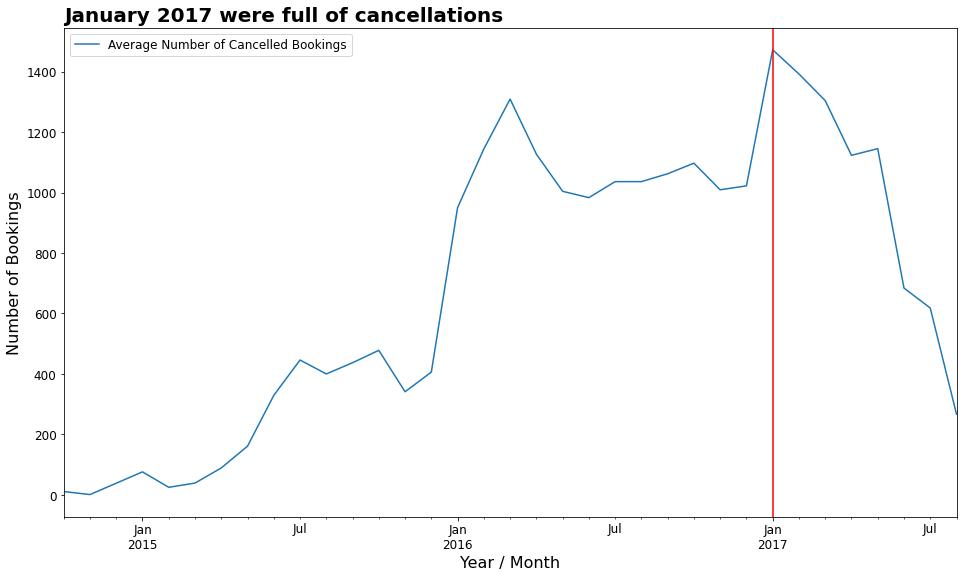

In [22]:
#Plotting

cancelled_bookings.plot(figsize = (16,9), fontsize = 12)
plt.title('January 2017 were full of cancellations', loc = 'left',fontsize = 20, fontweight = 'bold')
plt.xlabel('Year / Month', fontsize = 16)
plt.ylabel('Number of Bookings', fontsize = 16)
plt.legend(['Average Number of Cancelled Bookings'], fontsize =12)
plt.axvline(x = cancelled_bookings.index[cancelled_bookings['avg_num_cancelled_bookings'] == cancelled_bookings['avg_num_cancelled_bookings'].max()], color = 'red')
plt.show()

From the chart above, we could see that the number of cancellations were **peaked on January 2017**.